# 버스 노선 확인 
(1) 이용 승객 내림차순 정리  
(2) 일자별 각 버스 이용 승객 변화 시각화

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 윈도우의 한글 폰트 설정
plt.rc('font', family = 'Malgun Gothic')

# 시각화 그래프가 노트북 안에 보이게 하기
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [4]:
# 서울시 버스노선별 정류장별 시간대별 승하차 인원 정보 (12월)
# url : http://data.seoul.go.kr/dataList/OA-12913/S/1/datasetView.do;jsessionid=31D5954E273D1A112655EE5150E04982.new_portal-svr-11
df_20 = pd.read_csv('./data/BUS_STATION_BOARDING_MONTH_202012.csv',low_memory = False,encoding = 'EUC-KR')


In [5]:
# column 개수 확인
df_20.columns

Index(['사용일자', '노선번호', '노선명', '버스정류장ARS번호', '역명', '승차총승객수', '하차총승객수', '등록일자'], dtype='object')

In [6]:
# row개수 1,189,541개 약 120만개 
df_20.shape

(1189541, 8)

In [7]:
#일자, 노선번호, 각 정류소명에 따라 정렬이 되어있음을 확인
df_20.head(10)

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20201201,100,100번(하계동~용산구청),11428,한성여객종점,36,3,20201204
1,20201201,100,100번(하계동~용산구청),11387,노원평생학습관,4,3,20201204
2,20201201,100,100번(하계동~용산구청),11373,중계역,47,6,20201204
3,20201201,100,100번(하계동~용산구청),11381,중계목화아파트4단지,144,19,20201204
4,20201201,100,100번(하계동~용산구청),08007,돈암사거리.성신여대입구,64,276,20201204
5,20201201,100,100번(하계동~용산구청),08009,삼선교.한성대학교,89,206,20201204
6,20201201,100,100번(하계동~용산구청),01220,혜화역.마로니에공원,179,47,20201204
7,20201201,102,102번(상계동~동대문),10331,신창.창동시장,306,256,20201204
8,20201201,106,106번(의정부~동대문),01219,방송통신대.이화장,49,29,20201204
9,20201201,142,142번(도봉동~고속터미널),10006,서울북부지방법원.검찰청.도봉역성황당,42,166,20201204


In [8]:
# unique사용해서 중복 제거한 버스 확인
df_20['노선번호'].unique()

array(['100', '102', '106', '142', '162', '600', '2112', '463', '704',
       '750B', '1155', '143', '1156', 'N15', '601', '2227', '2211',
       '4419', '5413', '771', '2222', '740', '2312', '5530', '2233',
       '602', '5531', '5534', '5535', '5536', '362', '5623', '171',
       '2311', '5624', '654', '5625', '5626', '603', '342', '5627',
       '5630', '5714', '5713', '674', '2413', '173', '6513', '6616',
       '6635', '604', '6637', '3212', '6654', '6638', '8761', '8771',
       '8551', '673', '8331', '7734', '3217', '7016', '7017', '773',
       '7021', '3313', '7726', '172', '7727', '774', '605', '3314',
       '7728', '110A', '7025', '440', '3315', '441', '761', '541', '6615',
       '3411', '02', '542', '6516', '9711A', '9701', '606', '3412',
       '3321', '9703', '3012', '9408', '144', '9403', '121', '9707',
       '4211', '9401', '3413', '9404', '700', '242', '260', 'N26', '3322',
       '3414', '640', 'N37', '3426', '강동02', '4435', '507', '3416', 'N65',
       '702B', '56

---
## 서울시 전체 버스에 대해서 정렬하기

In [9]:
# 서울시 버스 노선 개수
len(df_20['노선번호'].unique())

623

In [10]:
lists = df_20['노선번호'].unique()
bus_num =[]

up_pass =[]
do_pass =[]
agg_pass =[]
for i in lists:
#     print(i)
    buses = df_20[df_20['노선번호']==i]
    bus_num.append(i)
    buses['총 승객수'] = buses['승차총승객수']+buses['하차총승객수']
    up_pass.append(buses['승차총승객수'].sum())
    do_pass.append(buses['하차총승객수'].sum())
    agg_pass.append(buses['총 승객수'].sum())

da = {
   '노선번호': bus_num,
    '승차총승객수': up_pass,
   '하차총승객수': do_pass,
   '총 승객수': agg_pass}

In [11]:
bus= pd.DataFrame(data=da)
bus

,노선번호,승차총승객수,하차총승객수,총 승객수
0,100,338762,329687,668449
1,102,279875,273807,553682
2,106,238449,234231,472680
3,142,503582,488220,991802
4,162,336237,325823,662060
...,...,...,...,...
618,2115,272977,268129,541106
619,702A,380714,370403,751117
620,8777,73,73,146
621,8002,45,44,89


In [12]:
df_20[df_20['노선번호']=='143']# 서울시 버스 이용 승객 수를 내림차순으로 정렬한 표 
bus.sort_values(by ='총 승객수',ascending=False)

,노선번호,승차총승객수,하차총승객수,총 승객수
11,143,728922,703708,1432630
534,152,723820,708104,1431924
583,160,705697,686874,1392571
188,130,687739,673479,1361218
610,303,643834,632451,1276285
...,...,...,...,...
346,성북05,2151,2111,4262
530,8112,2121,2092,4213
283,03,1552,1490,3042
620,8777,73,73,146


,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,총 승객수
1165429,20201231,740,740번(덕은동~삼성역),03182,용산꿈나무종합타운.보건분소,42,48,20210103,90
1165443,20201231,740,740번(덕은동~삼성역),03179,효창공원앞역,123,121,20210103,244
1165538,20201231,740,740번(덕은동~삼성역),14149,공덕오거리,133,233,20210103,366
1165543,20201231,740,740번(덕은동~삼성역),12006,수색역앞,68,53,20210103,121
1165544,20201231,740,740번(덕은동~삼성역),12008,디지털미디어시티역,131,113,20210103,244
...,...,...,...,...,...,...,...,...,...
1188044,20201231,740,740번(덕은동~삼성역),22134,교대역3,114,63,20210103,177
1188045,20201231,740,740번(덕은동~삼성역),14150,공덕오거리,279,145,20210103,424
1188793,20201231,740,740번(덕은동~삼성역),35447,덕은동입구,0,13,20210103,13
1188794,20201231,740,740번(덕은동~삼성역),03178,용마루고개.효창파크푸르지오아파트,108,73,20210103,181


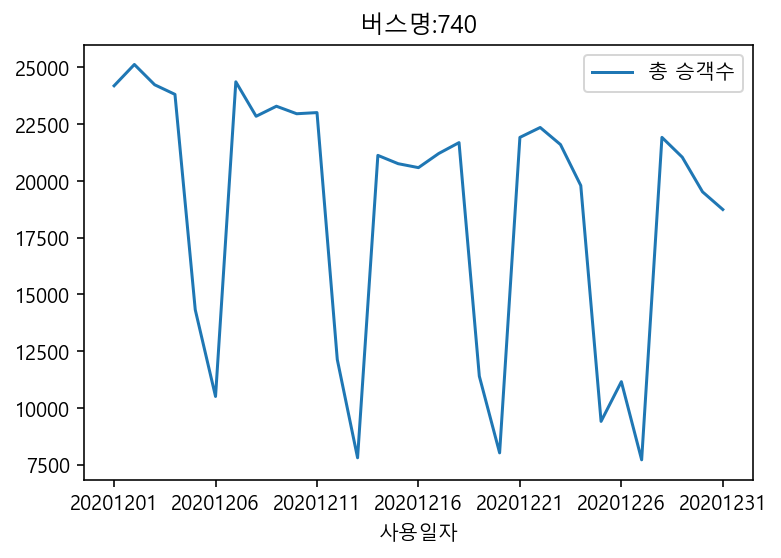

In [46]:
one_bus = '740'
bus_1 = df_20[df_20['노선번호']==one_bus]
date = []  # 사용일자 
up =[]     # 일자별 승차 승객수
do = []    # 일자별 하차 승객수
agg = []   # 일자별 총 승객수

for i in range(1,10):
    day = int('2020120'+str(i))
    date.append(str(day))
    bus_ = bus_1[bus_1['사용일자']==day]
    bus_['총 승객수'] = bus_['승차총승객수']+bus_['하차총승객수']
    up.append(bus_['승차총승객수'].sum())
    do.append(bus_['하차총승객수'].sum())
    agg.append(bus_['총 승객수'].sum())

for i in range(10,32):
    day = int('202012'+str(i))
    date.append(str(day))
    bus_= bus_1[bus_1['사용일자']==day]

    bus_['총 승객수'] = bus_['승차총승객수']+bus_['하차총승객수']
    up.append(bus_['승차총승객수'].sum())
    do.append(bus_['하차총승객수'].sum())
    agg.append(bus_['총 승객수'].sum())


data = {'사용일자':date,
        '승차총승객수': up,
        '하차총승객수': do,
        '총 승객수' : agg}

# 일자별 버스 승차, 하차, 총 승객수
bus_check = pd.DataFrame(data=data)
# bus_check
bus_check.plot.line(x='사용일자',y='총 승객수',title='버스명:{}'.format(one_bus))
bus_

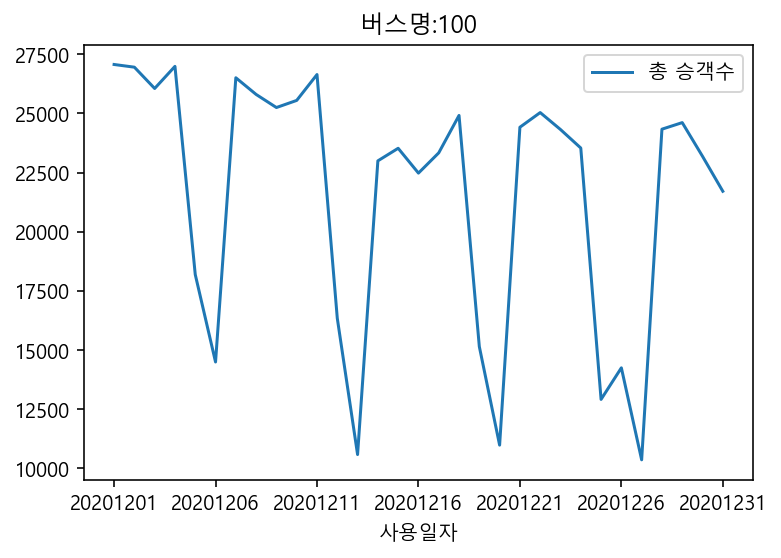

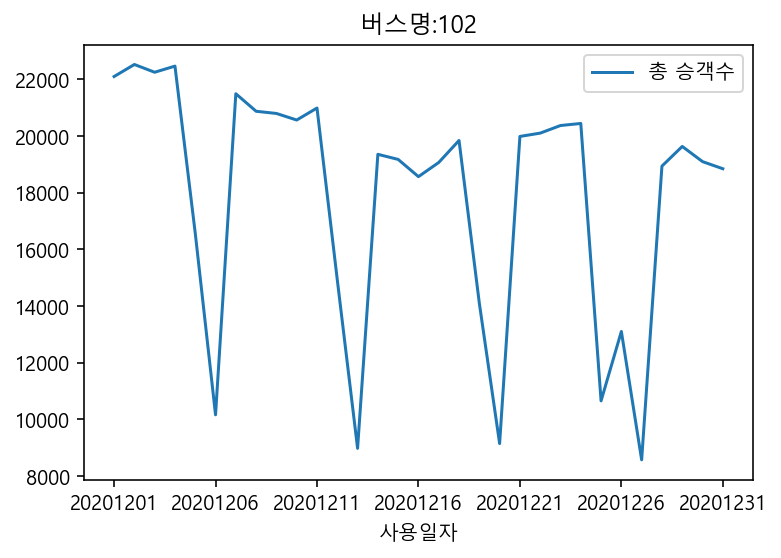

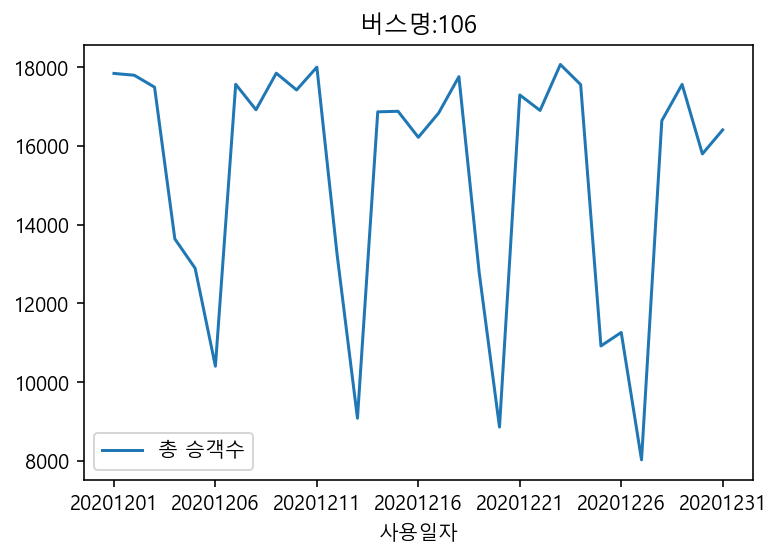

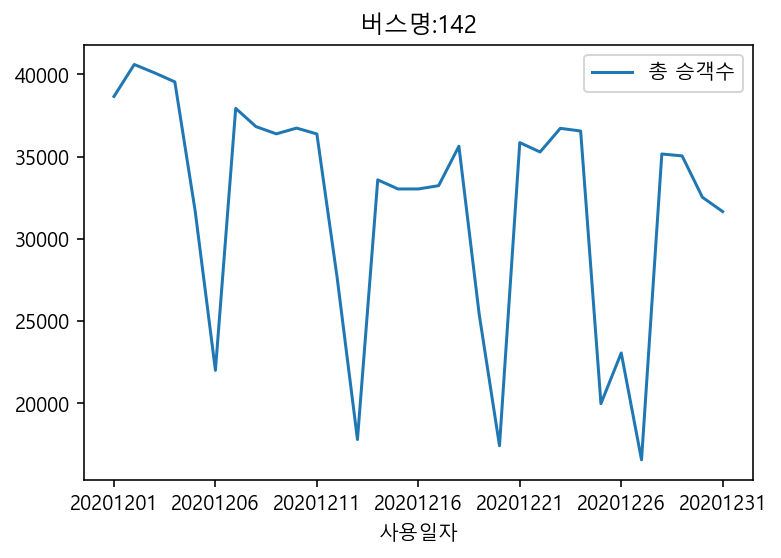

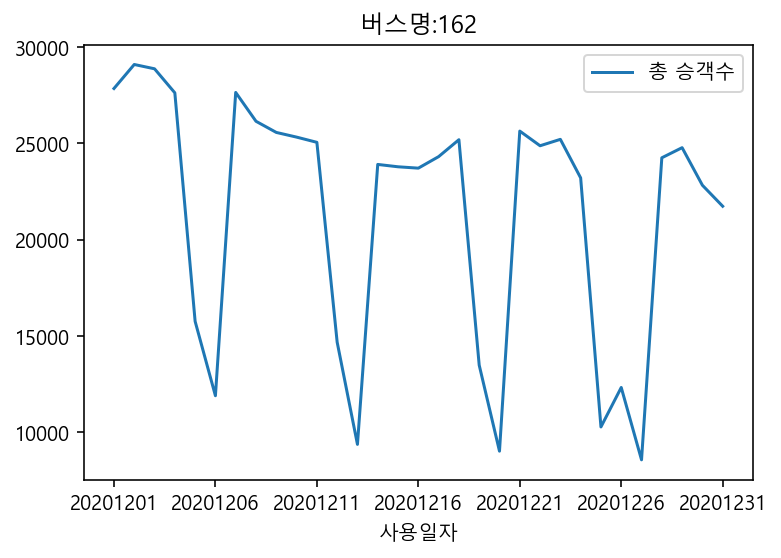

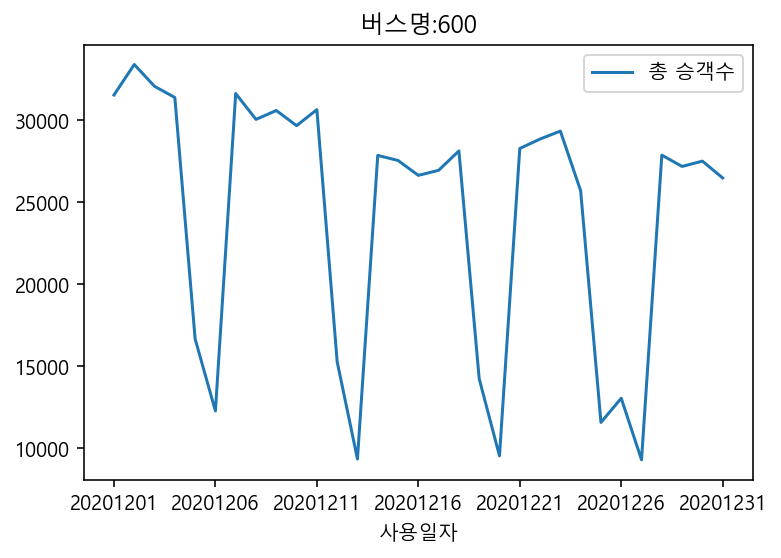

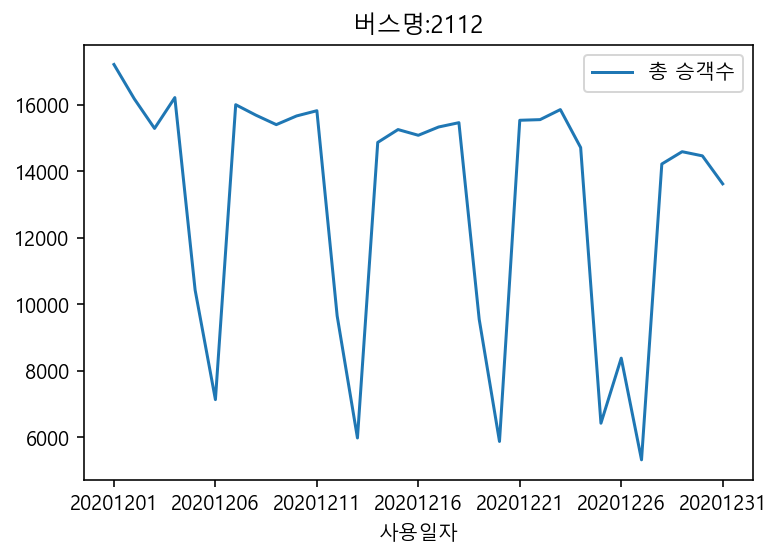

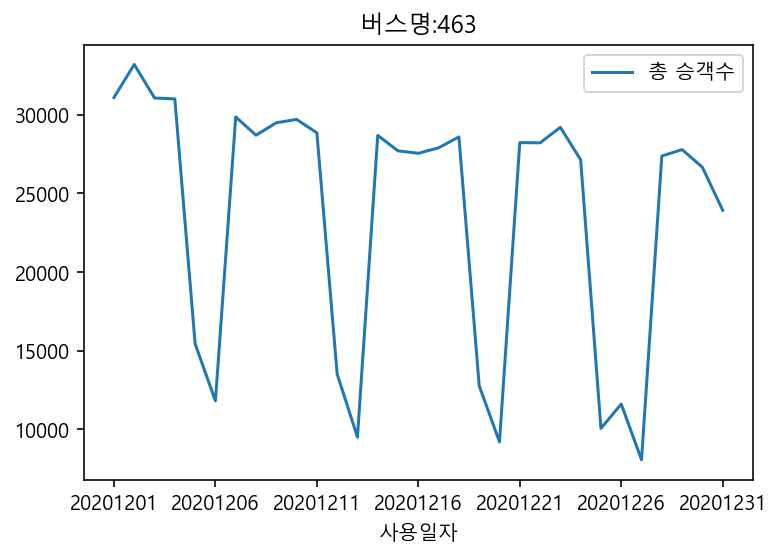

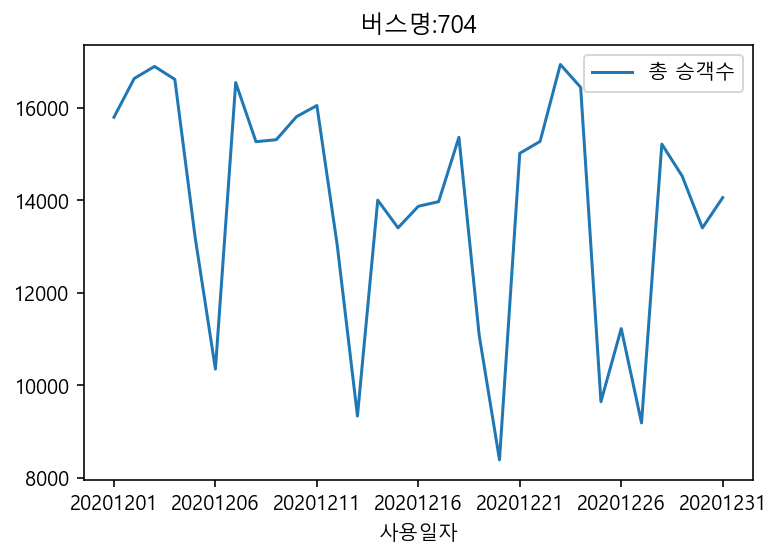

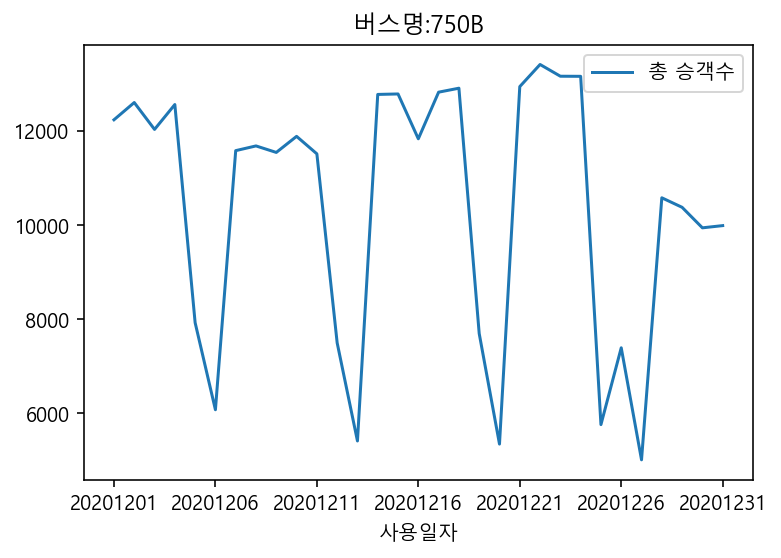

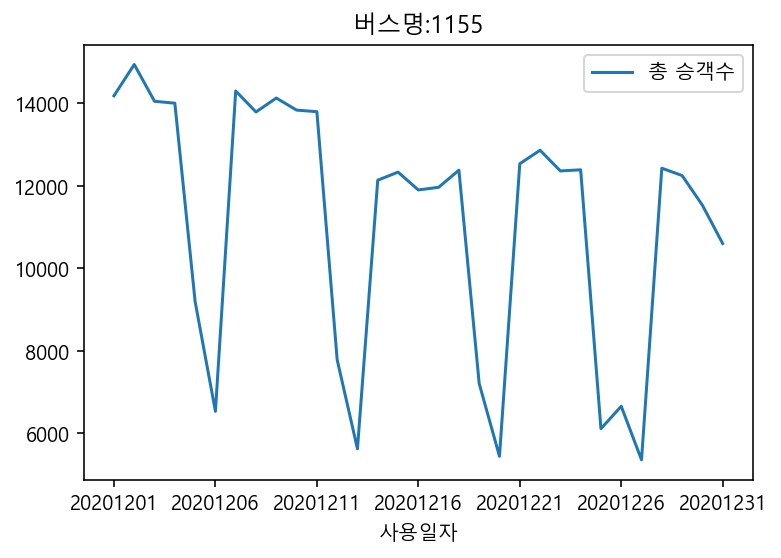

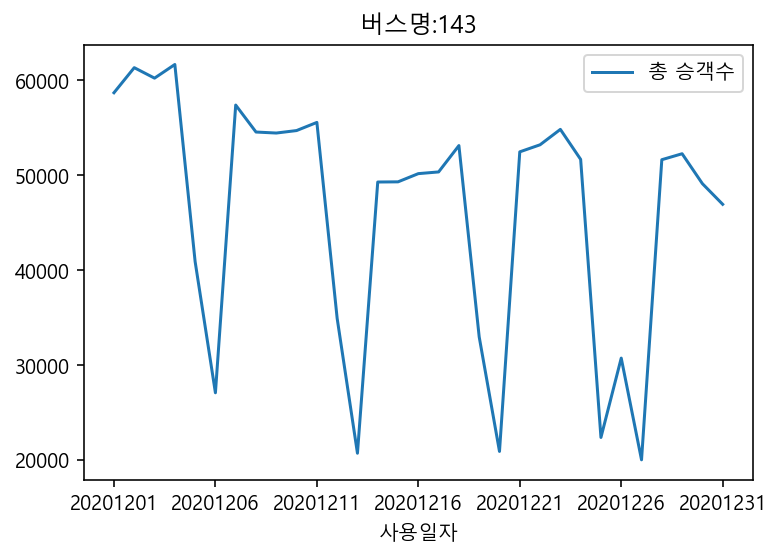

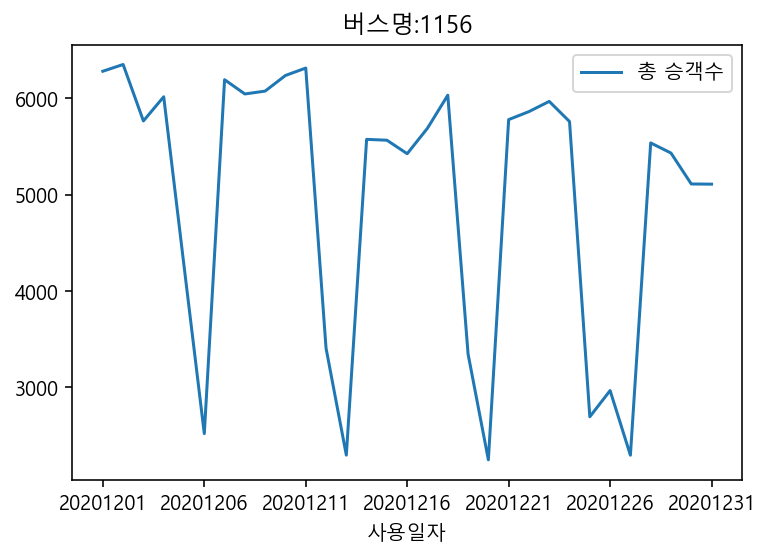

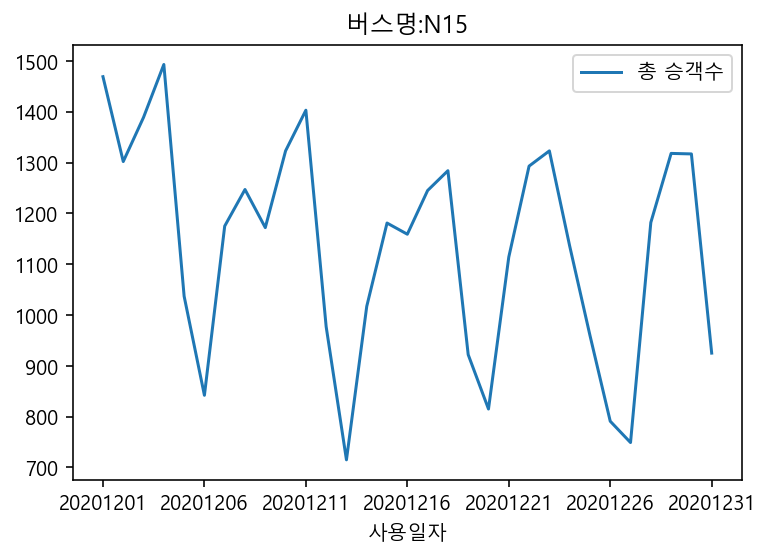

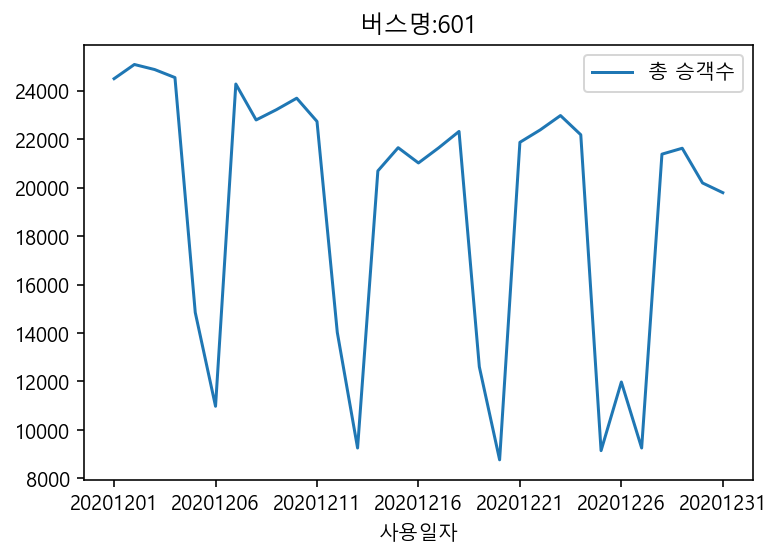

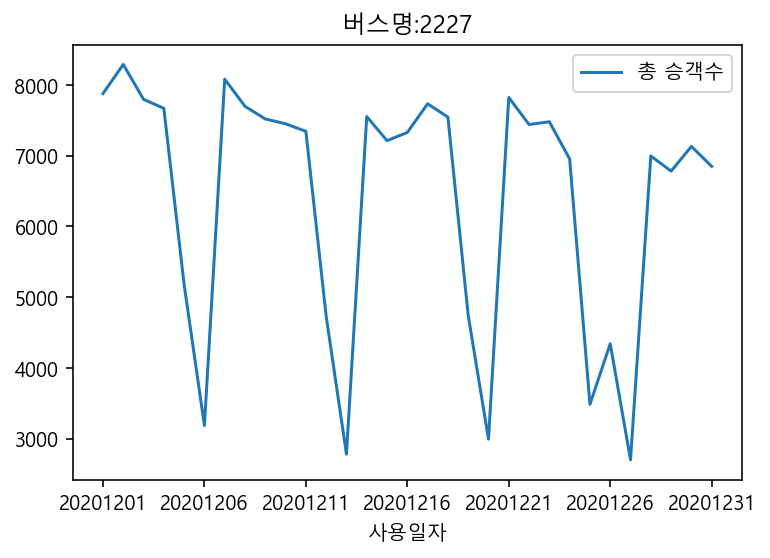

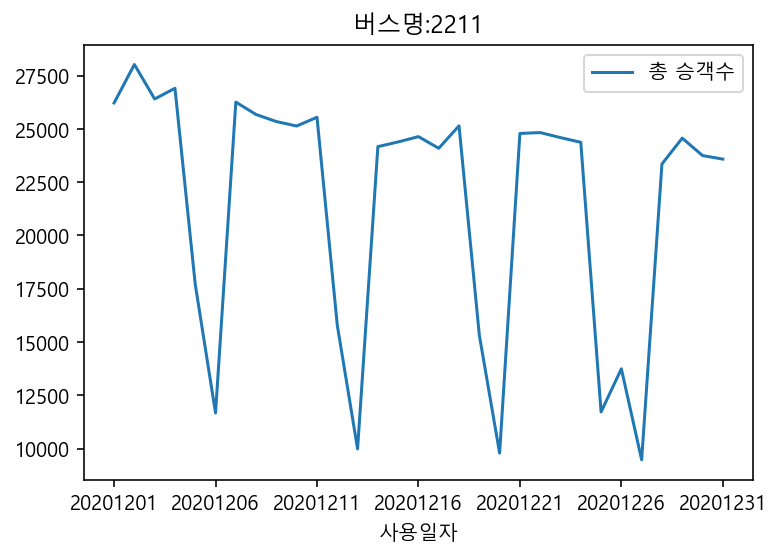

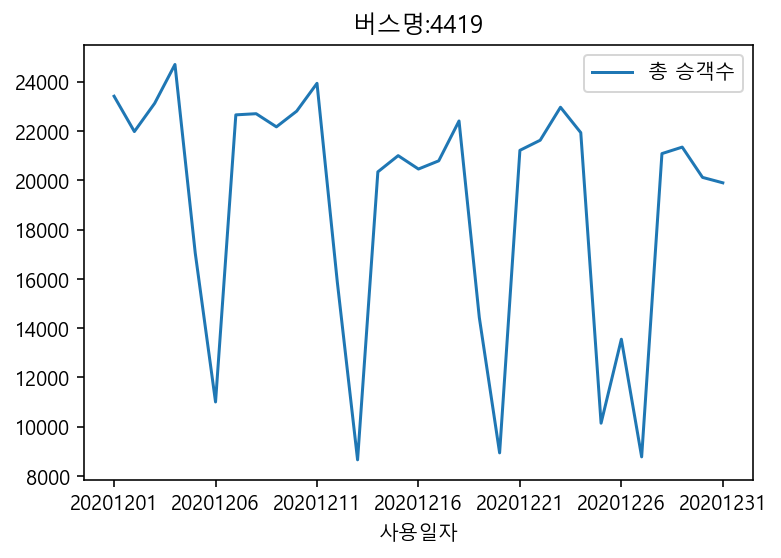

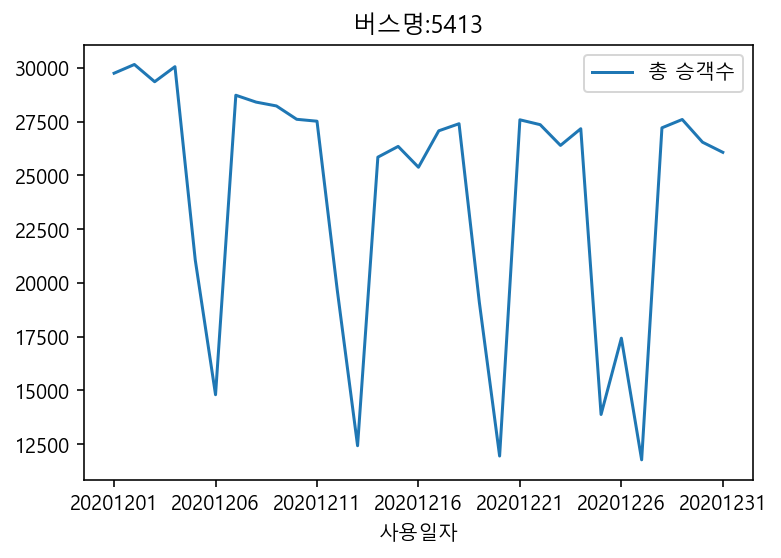

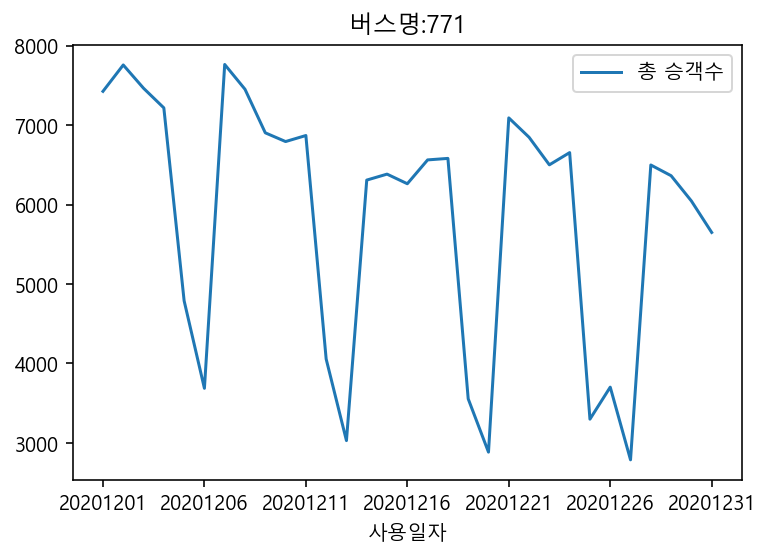

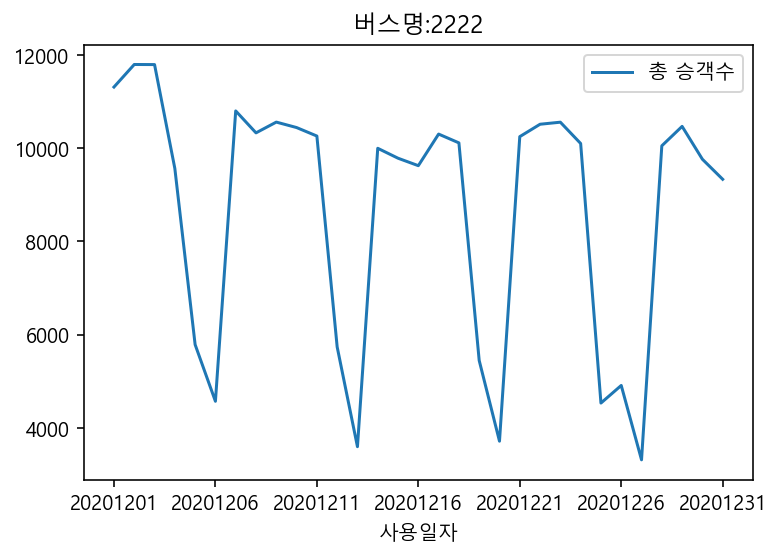

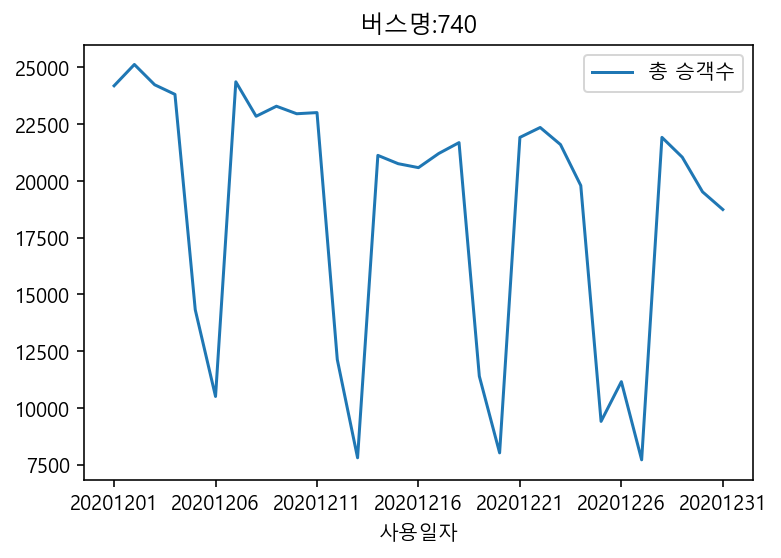

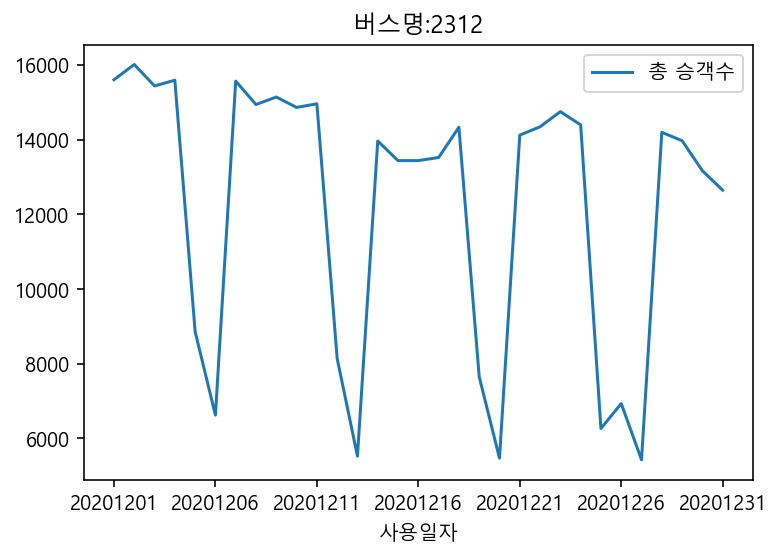

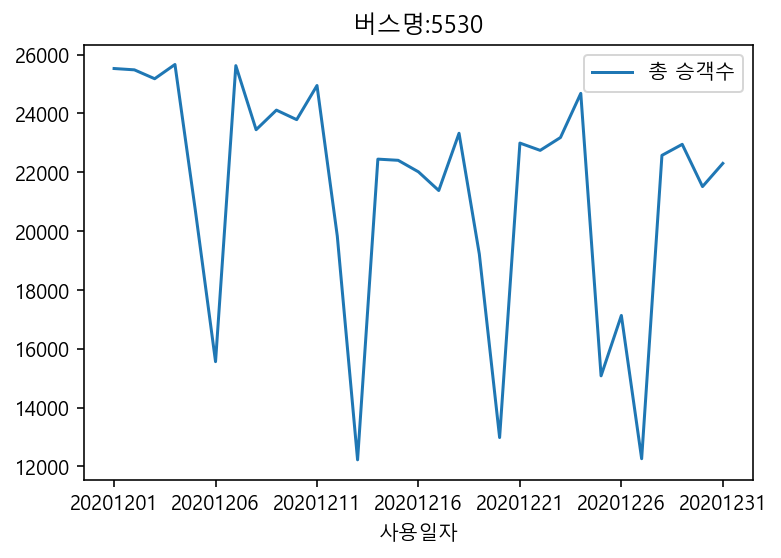

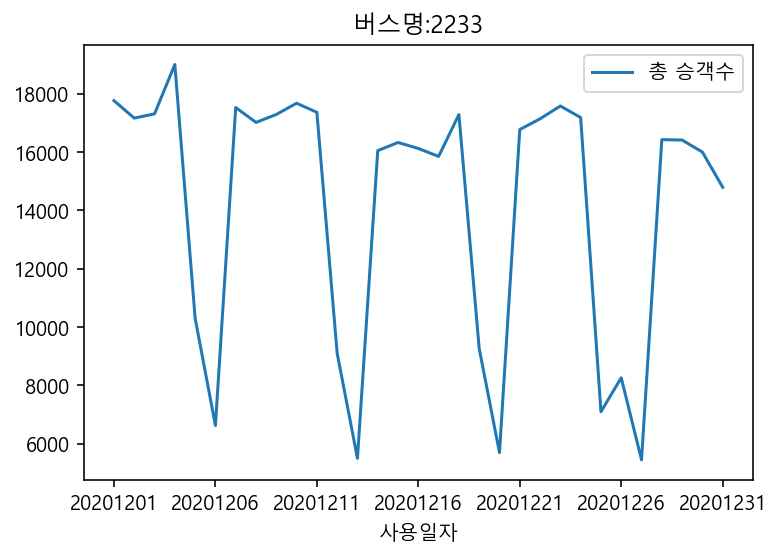

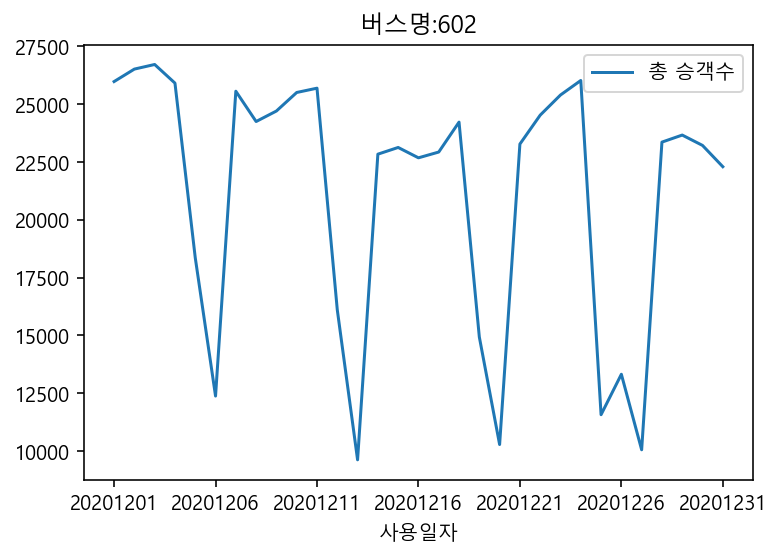

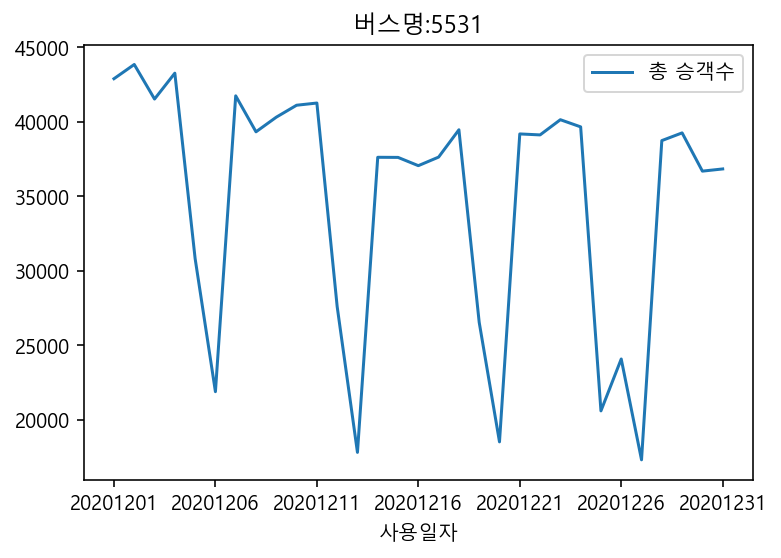

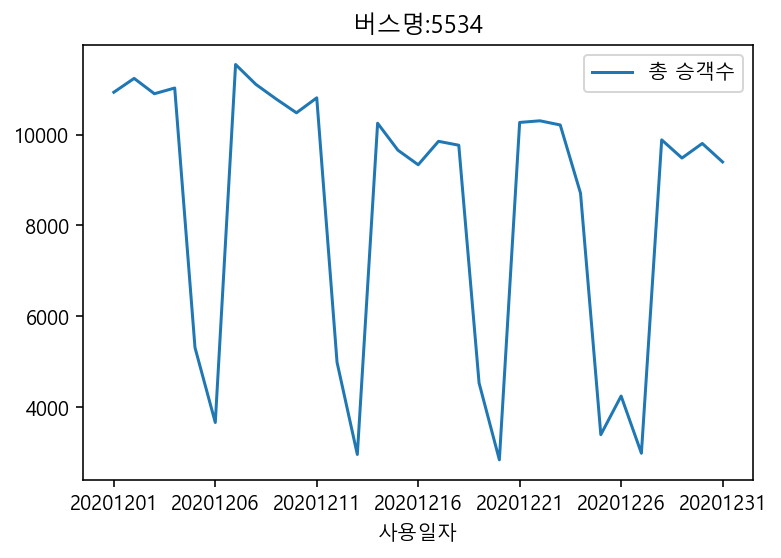

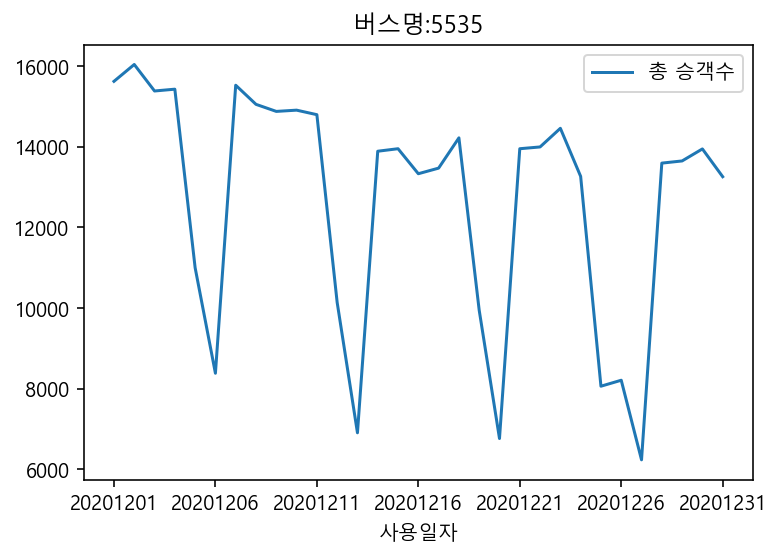

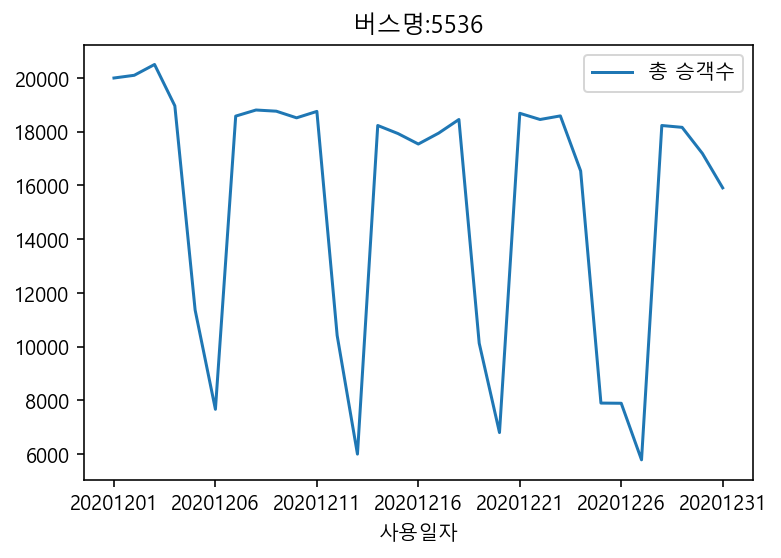

In [51]:
bus_list = df_20['노선번호'].unique()

# 상위 30개 버스
for one_bus in bus_list[:30]:
#     print(type(one_bus))
    date = []  # 사용일자 
    up =[]     # 일자별 승차 승객수
    do = []    # 일자별 하차 승객수
    agg = []   # 일자별 총 승객수

    bus_1 = df_20[df_20['노선번호']==one_bus]
    for i in range(1,10):
        day = int('2020120'+str(i))
        date.append(str(day))
        bus_ = bus_1[bus_1['사용일자']==day]
        bus_['총 승객수'] = bus_['승차총승객수']+bus_['하차총승객수']
        up.append(bus_['승차총승객수'].sum())
        do.append(bus_['하차총승객수'].sum())
        agg.append(bus_['총 승객수'].sum())

    for i in range(10,32):
        day = int('202012'+str(i))
        date.append(str(day))
        bus_= bus_1[bus_1['사용일자']==day]

        bus_['총 승객수'] = bus_['승차총승객수']+bus_['하차총승객수']
        up.append(bus_['승차총승객수'].sum())
        do.append(bus_['하차총승객수'].sum())
        agg.append(bus_['총 승객수'].sum())



    data = {'사용일자':date,
            '승차총승객수': up,
            '하차총승객수': do,
            '총 승객수' : agg}

    # 일자별 버스 승차, 하차, 총 승객수
    bus_check = pd.DataFrame(data=data)
    # bus_check
    bus_check.plot.line(x='사용일자',y='총 승객수',title='버스명:{}'.format(one_bus))

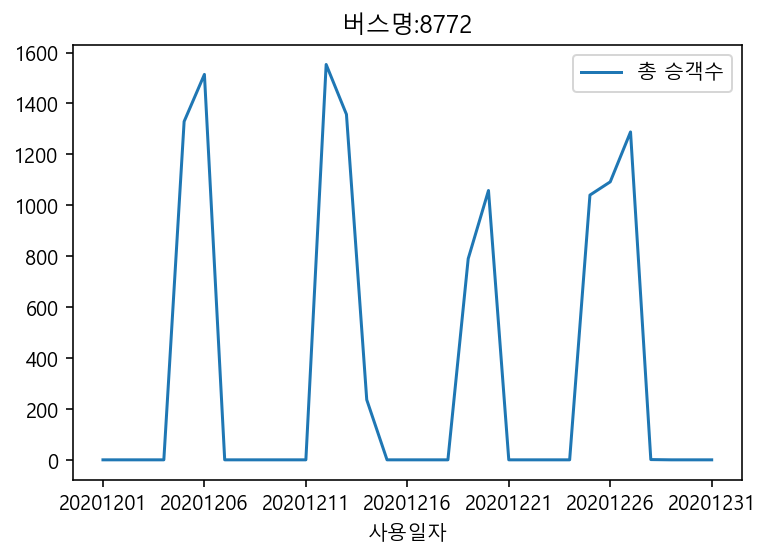

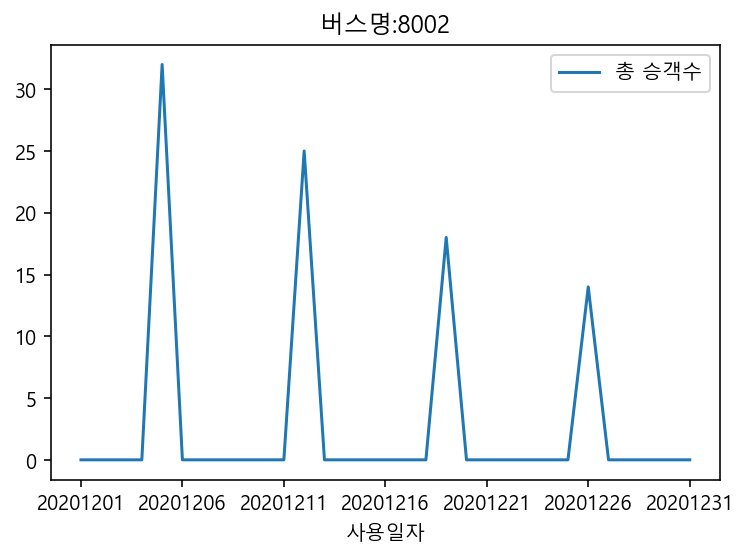

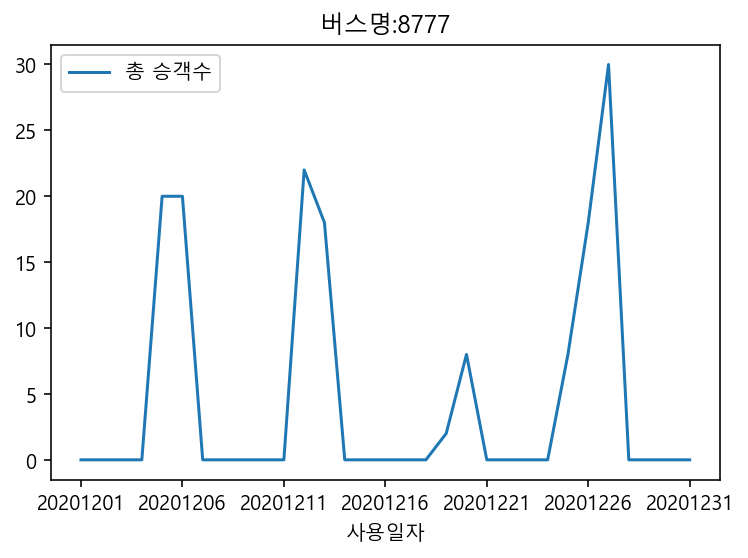

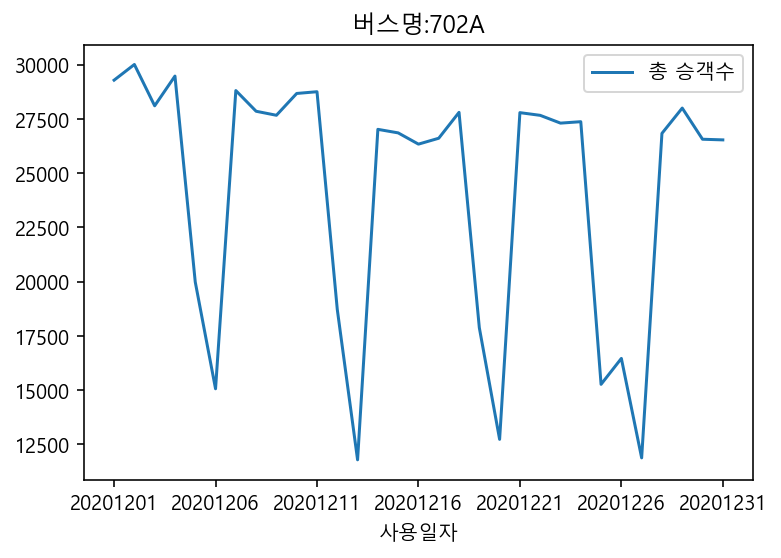

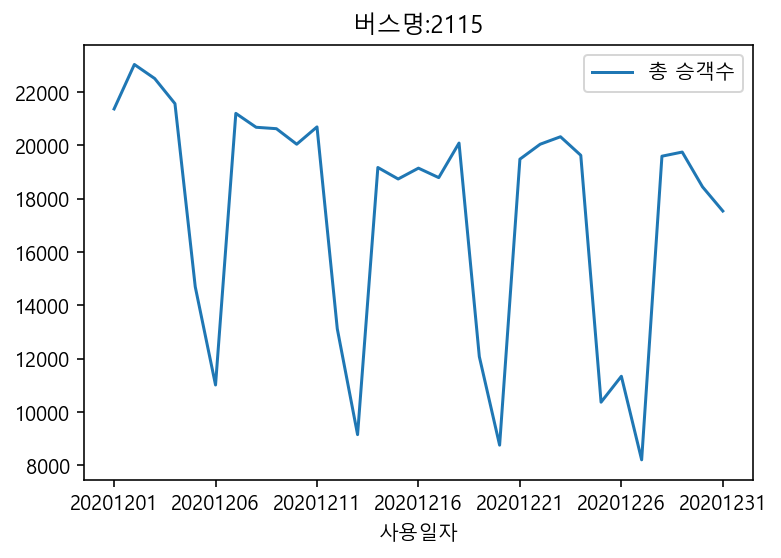

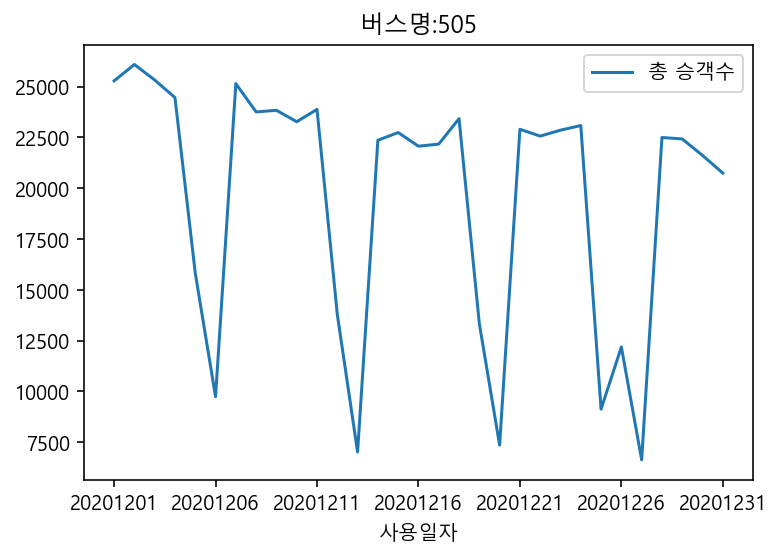

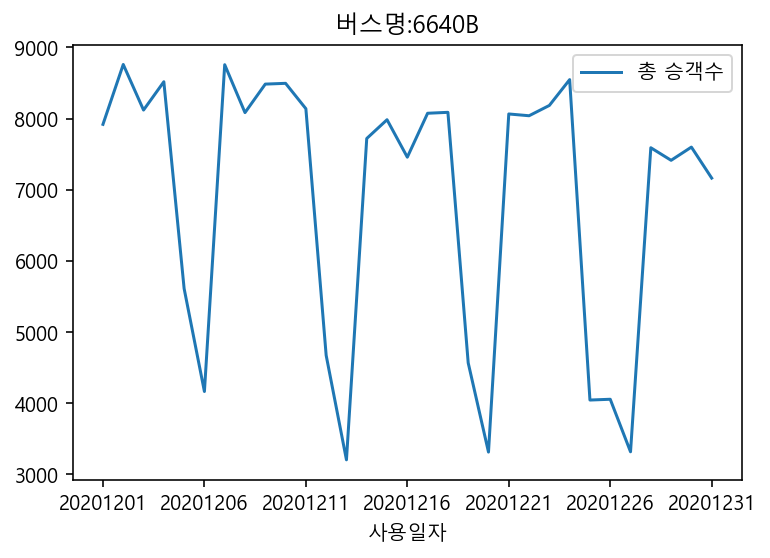

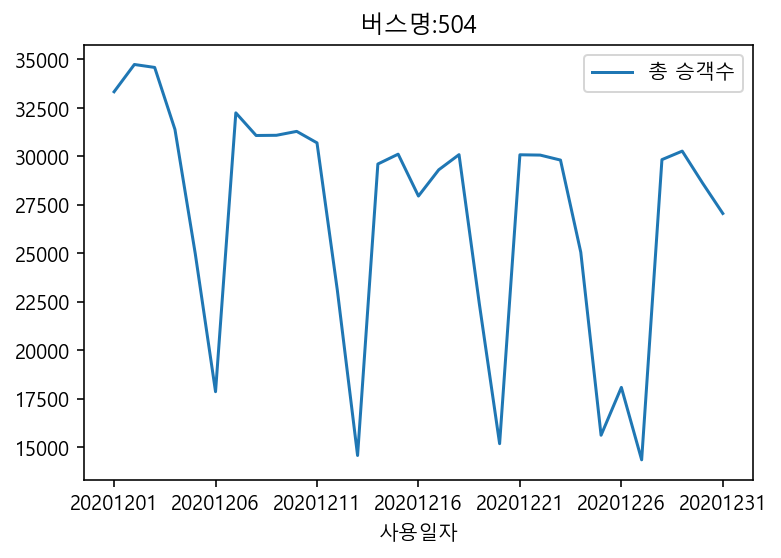

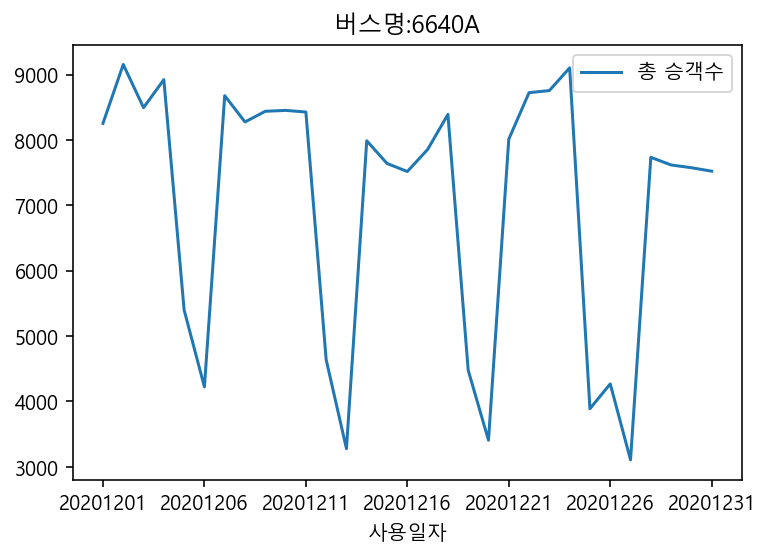

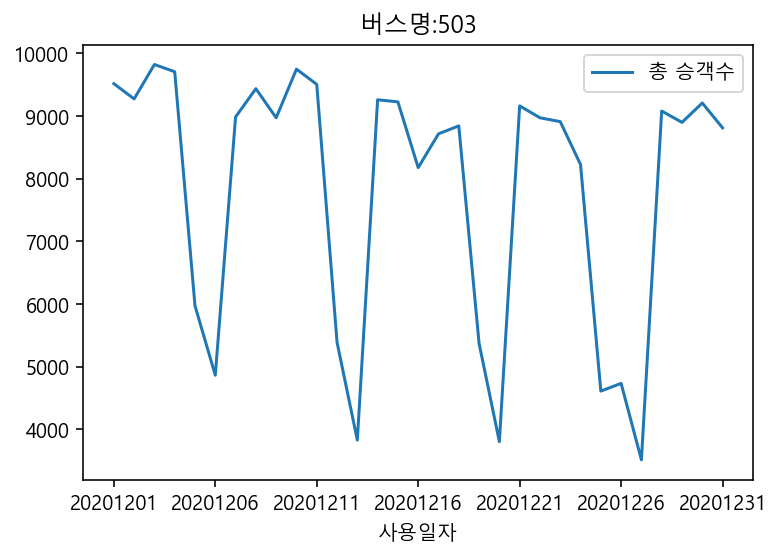

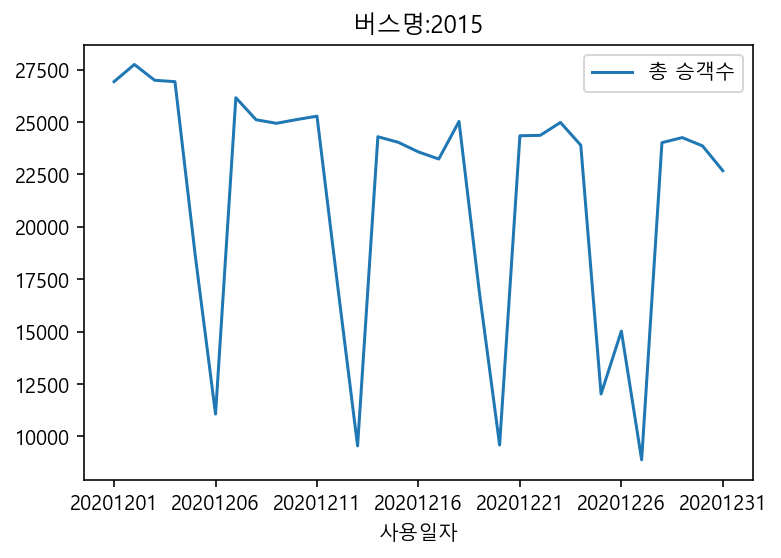

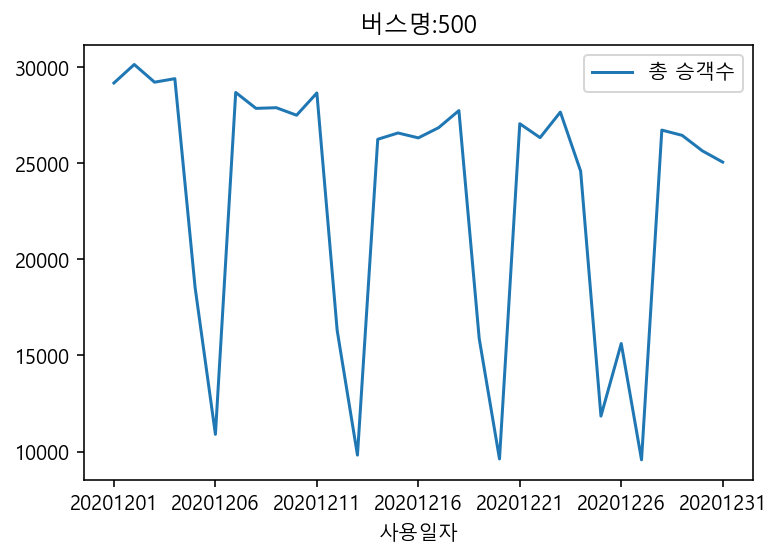

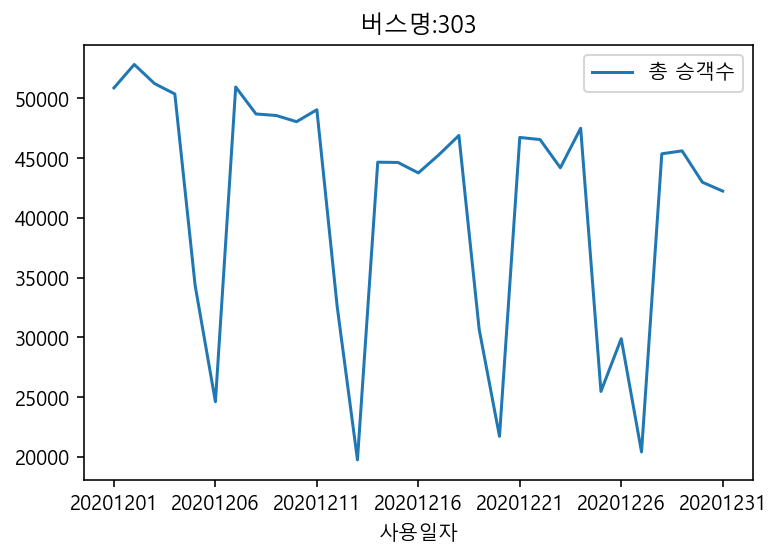

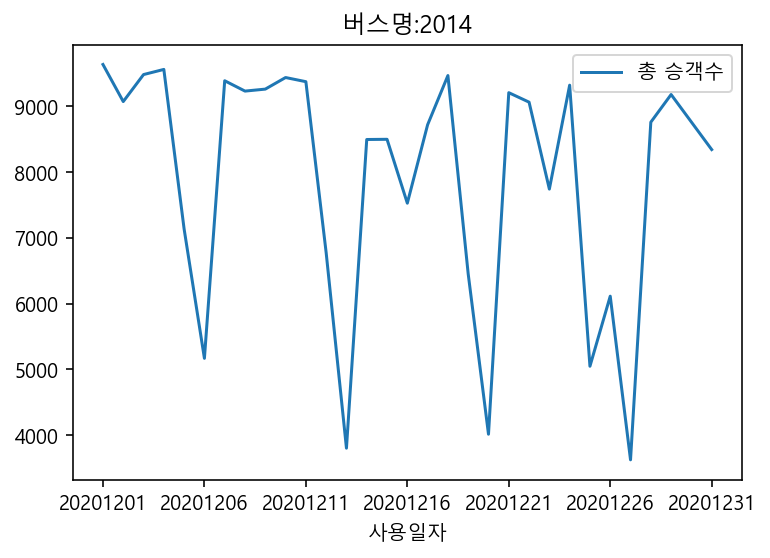

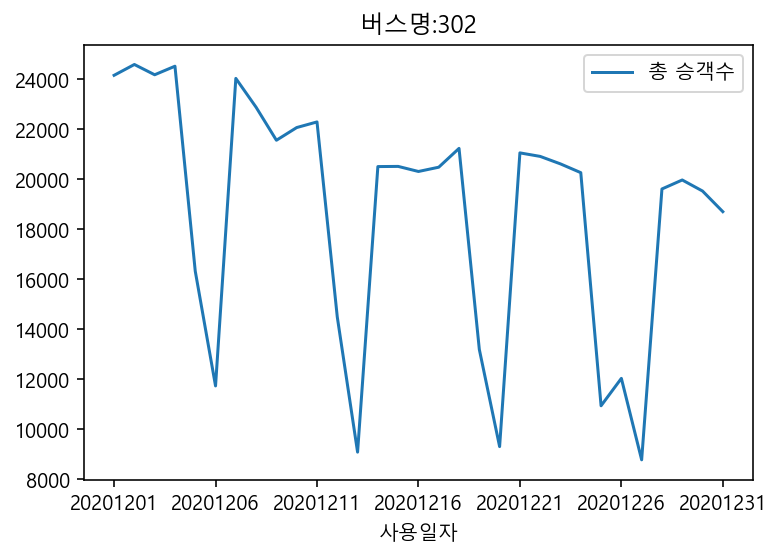

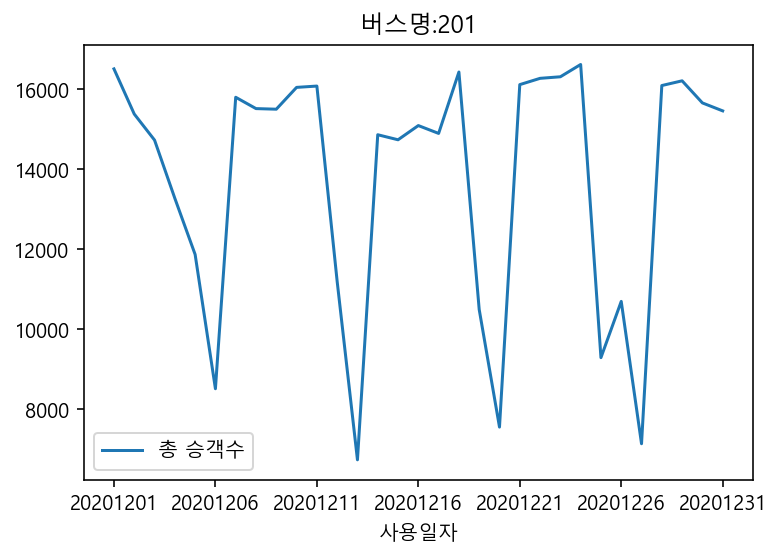

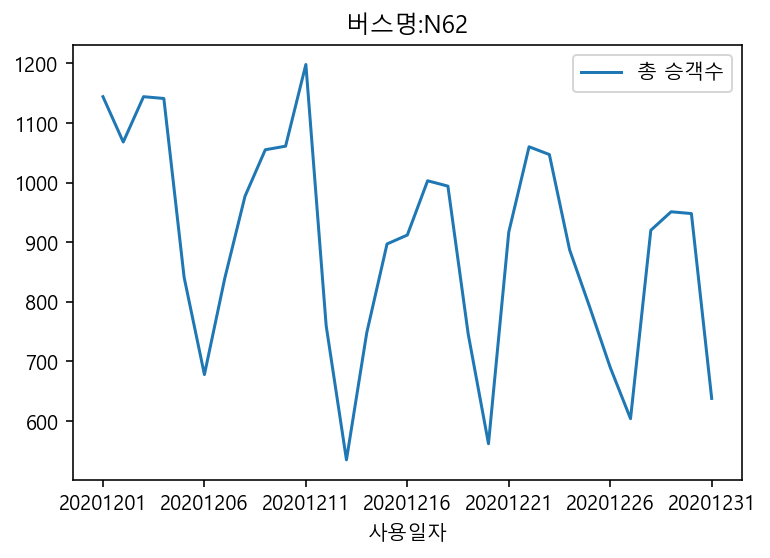

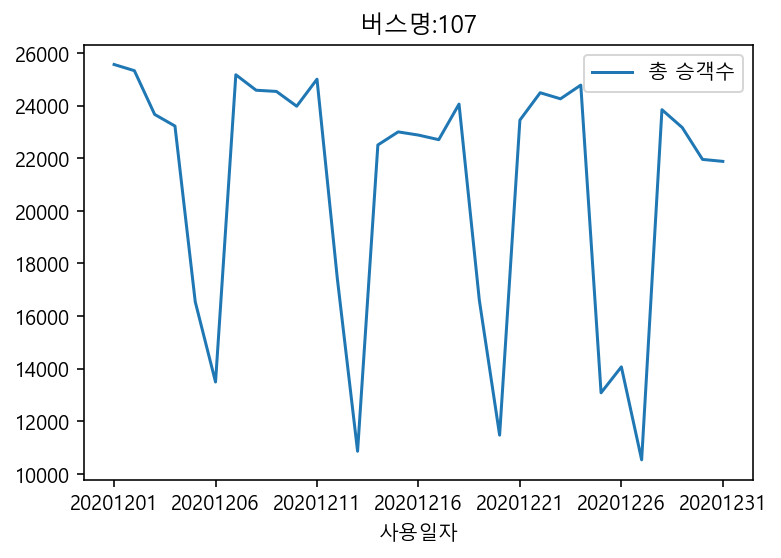

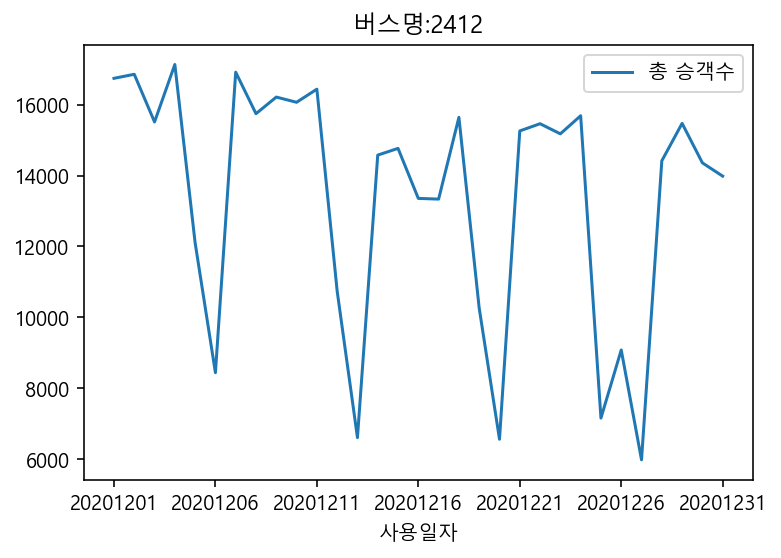

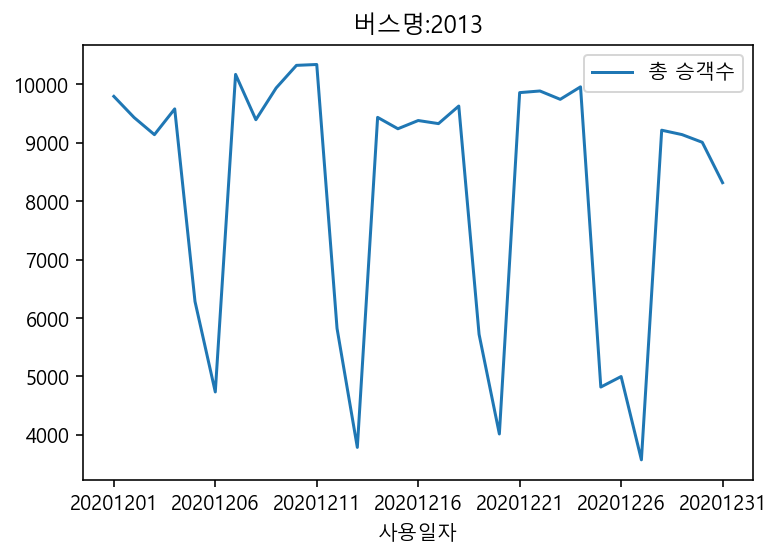

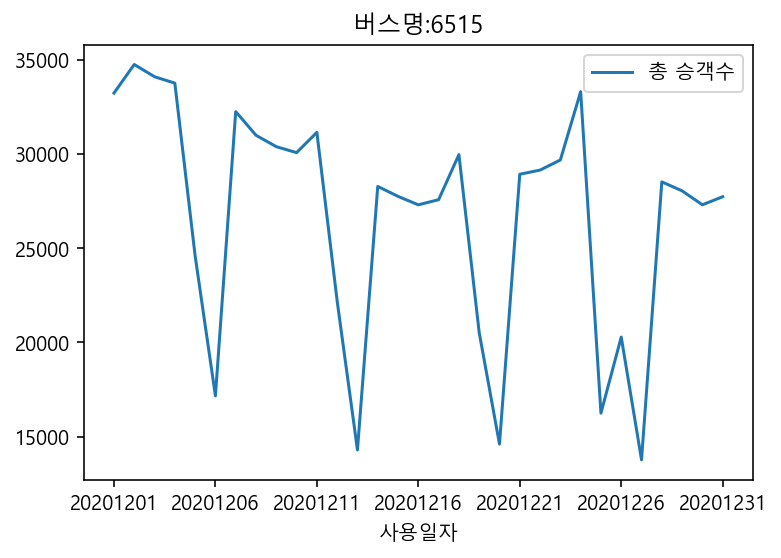

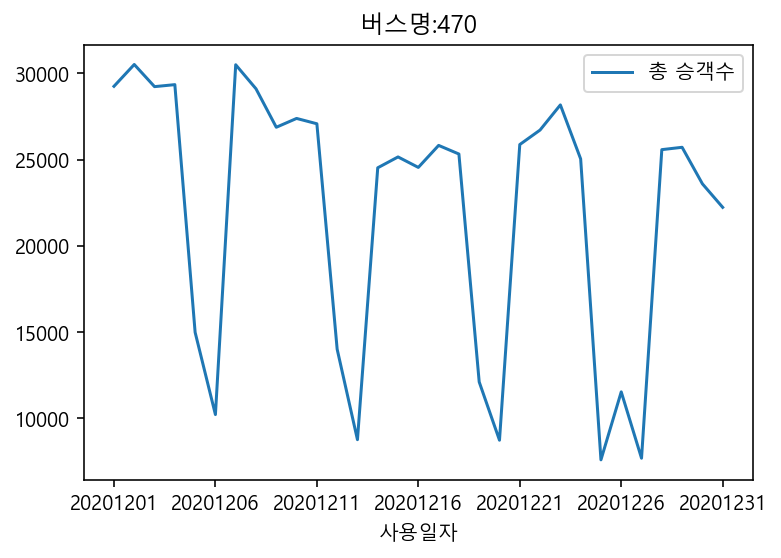

In [50]:
bus_list = df_20['노선번호'].unique()

# 하위 23개 버스
for one_bus in bus_list[:600:-1]:
#     print(type(one_bus))
    date = []  # 사용일자 
    up =[]     # 일자별 승차 승객수
    do = []    # 일자별 하차 승객수
    agg = []   # 일자별 총 승객수

    bus_1 = df_20[df_20['노선번호']==one_bus]
    for i in range(1,10):
        day = int('2020120'+str(i))
        date.append(str(day))
        bus_ = bus_1[bus_1['사용일자']==day]
        bus_['총 승객수'] = bus_['승차총승객수']+bus_['하차총승객수']
        up.append(bus_['승차총승객수'].sum())
        do.append(bus_['하차총승객수'].sum())
        agg.append(bus_['총 승객수'].sum())

    for i in range(10,32):
        day = int('202012'+str(i))
        date.append(str(day))
        bus_= bus_1[bus_1['사용일자']==day]

        bus_['총 승객수'] = bus_['승차총승객수']+bus_['하차총승객수']
        up.append(bus_['승차총승객수'].sum())
        do.append(bus_['하차총승객수'].sum())
        agg.append(bus_['총 승객수'].sum())



    data = {'사용일자':date,
            '승차총승객수': up,
            '하차총승객수': do,
            '총 승객수' : agg}

    # 일자별 버스 승차, 하차, 총 승객수
    bus_check = pd.DataFrame(data=data)
    # bus_check
    bus_check.plot.line(x='사용일자',y='총 승객수',title='버스명:{}'.format(one_bus))